In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import cmath
import csv


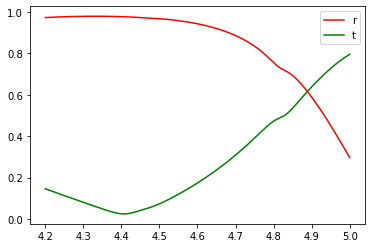

In [107]:

filename = "D:/Coupled-mode Theory/simu for fitting/0.8-0.4.txt"

with open (filename,'rt',encoding='UTF-8') as raw_data:
  data = np.loadtxt(raw_data,delimiter='\t')
xdata = data[:,0]
rdata = data[:,1] + data[:,2] * 1j
rdata = abs(rdata)                              # 拟合的幅值
plt.plot(xdata, rdata, 'r-', label='r')

tdata = data[:,3] + data[:,4] * 1j
tdata = abs(tdata)
plt.plot(xdata, tdata, 'g-', label='t')

plt.legend()
plt.show()

comb_Y = np.append(rdata, tdata)
comb_X = np.append(xdata, xdata)

In [4]:
# 定义需要拟合的函数
def func_t(x, f1re, f2re, kre, Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    t_up = (W_3*2*cmath.cos(2*yita) - (W_1)-(W_2))*Tao1
    t_down = W_2 * W_1 - (W_3)**2
    ft = t_up / t_down + 1
    return abs(ft)

In [5]:
def func_r(x, f1re, f2re, kre,  Tao1Are,  Tao2Are,  d, yita):
    f1 = f1re 
    f2 = f2re 
    k = kre 
    Tao1A = Tao1Are 
    Tao2A = Tao2Are 

    Tao1 = d**2
    Tao2 = d**2
    X = Tao1*cmath.cos(2*yita)

    W_1 = 1j*(x-f1) + Tao1 + Tao1A
    W_2 = 1j*(x-f2) + Tao2 + Tao2A
    W_3 = X + k*1j

    r_up = (W_3*(-2) + (W_1)*cmath.exp(-2j*yita) + (W_2)*cmath.exp(2j*yita))*Tao1
    r_down = W_2 * W_1 - (W_3)**2
    fr = r_up /r_down
    return abs(fr)

In [108]:
def fun_comb(x_comb, kre, Tao1Are,  Tao2Are,  d, yita):
    f1re = 6.93
    f2re = 9.47
    extract1 = x_comb[:len(xdata)]
    extract2 = x_comb[len(xdata):]

    result1 = func_r(extract1, f1re, f2re,  kre,  Tao1Are, Tao2Are,  d, yita)
    result2 = func_t(extract2, f1re, f2re,  kre, Tao1Are, Tao2Are,  d, yita)
    return np.append(result1, result2)

In [109]:
b0 = [1,	0.09078936664313418,0.09,	2.439246123152593	,1.5796311622442956]
# b0 = np.random.rand(5)
# b0 = popt
bound = ([-10,0,0,-30,-30], [20,20,20,30,30])

popt, pcov = curve_fit(fun_comb, comb_X, comb_Y, b0, bounds=bound)
print(popt)

[3.23641109e+00 1.86574346e-13 5.63590360e-02 3.00000000e+01
 1.57766300e+00]


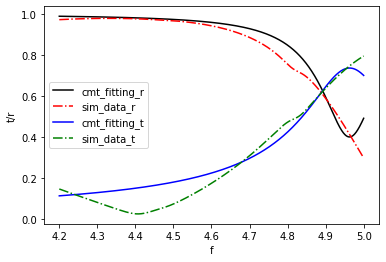

In [110]:
b0 = popt

plt.plot(xdata, fun_comb(comb_X, *b0)[0:len(xdata)], 'k-', label='cmt_fitting_r')
plt.plot(xdata, rdata, 'r-.', label='sim_data_r')
plt.plot(xdata, fun_comb(comb_X, *b0)[len(xdata):], 'b-', label='cmt_fitting_t')
plt.plot(xdata, tdata, 'g-.', label='sim_data_t')
plt.xlabel('f')
plt.ylabel('t/r')

plt.legend()
plt.show()

In [51]:
with open('fitting result.txt', 'a') as f:
    for b in popt:
        f.write('\t' + str(b))
    f.write('\n')